In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_FR = df[(df['job_country'] == 'France') & (df['job_title_short'] == 'Data Scientist')]

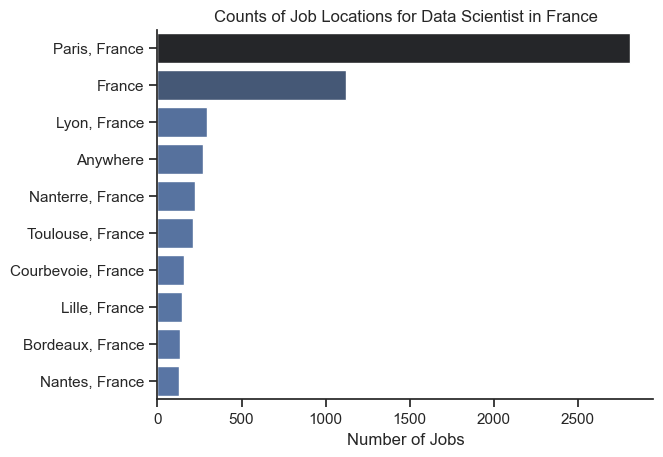

In [28]:
df_plot = df_DS_FR['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count' , y='job_location' , hue='count' , palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Scientist in France')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

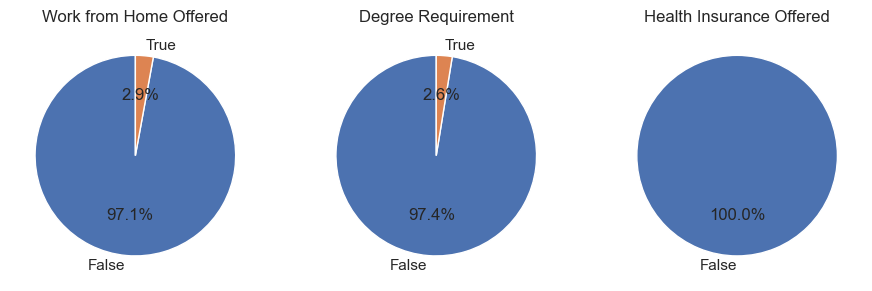

In [29]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DS_FR[column].dropna().value_counts()  # Drop NaN values
    labels = value_counts.index.astype(str).tolist()  # Generate labels dynamically
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()



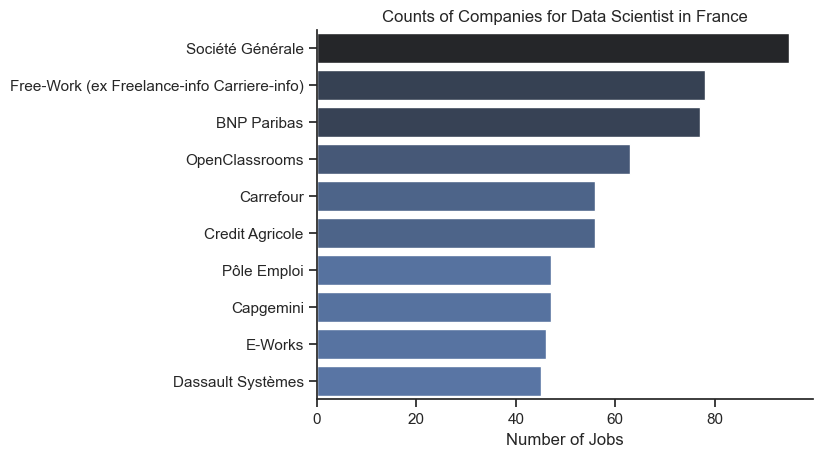

In [30]:
df_plot = df_DS_FR['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count' , y='company_name' , hue='count' , palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Scientist in France')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()